In [1]:
from pyhdf.SD  import SD, SDC
from pyhdf.V import *
from pyhdf.HDF import *
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB'] = 'D:\\program\\anaconda3\\Library\\share\\'
#os.environ['PROJ_LIB'] = '/home/C.jerryjerry9/anaconda3/share/proj/'
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import pprint
import gc 

#####Fuction for extracting variable names from hdf file
def HDFvars(File):
    hdfFile = SD(File, SDC.READ)
    dsets = hdfFile.datasets()
    k = []
    for key in dsets.keys():
        k.append(key)
    k.sort()
    hdfFile.end() # close the file
    return k
#####Function end 

In [2]:
filename = '2016257041749_55209_CS_2B-GEOPROF_GRANULE_P_R04_E06.hdf'
#讀取vdata
reading_vdata = HDF(filename, HC.READ).vstart()
vdata =reading_vdata.vdatainfo()

pprint.pprint(vdata[:])##把vdata存的變數名稱輸出
members = [ 8 , 10, 11, 18 ,31 ,38] ##我們想提出的geolocation data
nrecs = []
names = []
for ref in members:
 #       # Vdata tag
    vd = reading_vdata.attach(ref)
    nrecs.append(vd.inquire()[0])  ## number of records of the Vdata
    names.append(vd.inquire()[-1]) ## name of the Vdata
    vd.detach()

print(names)##輸出的變數名稱
print(nrecs)##變數矩陣的長度

# Read geolocation dataset.
#['UTC_start', 'Latitude', 'Longitude', 'Data_quality', 'MODIS_Cloud_Fraction','Navigation_land_sea_flag']
idx = names.index('UTC_start')
var = reading_vdata.attach(members[idx])
UTC_time = var.read(nrecs[idx])

idx = names.index('Latitude')
var = reading_vdata.attach(members[idx])
latitude = var.read(nrecs[idx])

idx = names.index('Longitude',)
var = reading_vdata.attach(members[idx])
longitude = var.read(nrecs[idx])

idx = names.index('MODIS_Cloud_Fraction',)
var = reading_vdata.attach(members[idx])
MODIS_cloud_fraction = var.read(nrecs[idx])

idx = names.index('Data_quality',)
var = reading_vdata.attach(members[idx])
data_quality = var.read(nrecs[idx])

del reading_vdata
print(gc.collect())

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

In [3]:
lat_demo = pd.DataFrame(latitude[:], columns= ['緯度'])
print(lat_demo.shape)
print(lat_demo.head())

(20678, 1)
          緯度
0 -76.257103
1 -76.249382
2 -76.241661
3 -76.233932
4 -76.226196


In [4]:
lon_demo = pd.DataFrame(longitude[:], columns= ['經度'])
print(lon_demo.shape)
print(lon_demo.head())

(20678, 1)
           經度
0  170.945740
1  170.920837
2  170.895935
3  170.871094
4  170.846359


In [5]:
#以台灣為中心畫圖，所以要調整一下經度的表示方式
mo_longitude=np.asarray(longitude)
shape1 = mo_longitude.shape

for i in range(0,shape1[0]):
    if mo_longitude[i] < -60:
        mo_longitude[i]=mo_longitude[i]+360


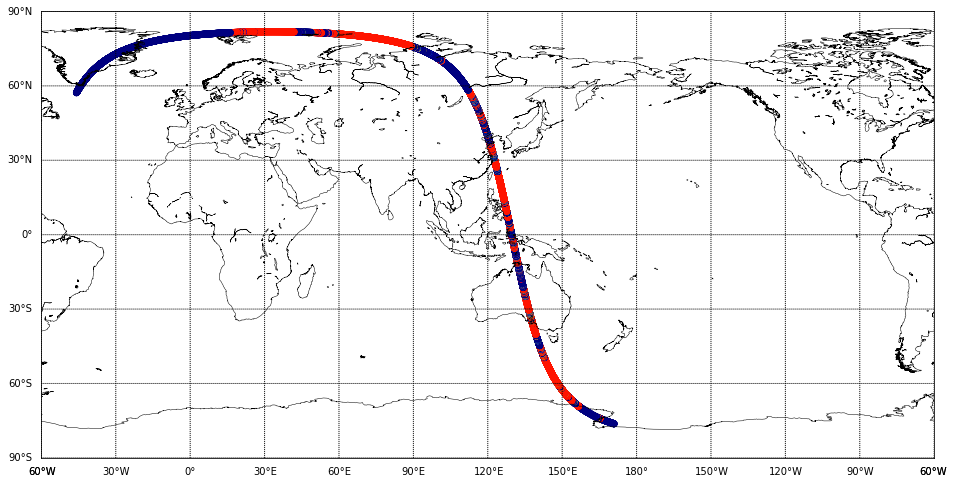

In [6]:
fig = plt.figure(figsize=(16,12)) 
m = Basemap(llcrnrlon=-60, urcrnrlon=300., llcrnrlat=-90., urcrnrlat=90.,resolution='l')
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 30.), labels=[0, 0, 0, 1])
m.scatter(mo_longitude[:], latitude[:] , c=MODIS_cloud_fraction[:] ,cmap=plt.cm.get_cmap('jet',10), vmin=10, vmax=120)
#plt.show()

In [8]:
#利用經緯度矩陣的值找出台灣附近在矩陣中的位置
mo_longitude=np.asarray(longitude)
mo_latitude=np.asarray(latitude)
shape1 = mo_longitude.shape
lonlat_mask= np.zeros((shape1[0],1),dtype=int)

for i in range(0,shape1[0]):
    if mo_longitude[i] >115  and  mo_longitude[i]<130  and  mo_latitude[i] > 15  and  mo_latitude[i] < 30:
        lonlat_mask[i]= 1##有在所選經緯度涵蓋範圍的矩陣會被設成'1'
        
region_array_size=sum(lonlat_mask)
print("Array length over select region:")
print(sum(region_array_size))


Array length over select region:
1556


In [9]:
HDFvars(filename)

['CPR_Cloud_mask', 'Gaseous_Attenuation', 'Height', 'Radar_Reflectivity']

In [10]:
# Read dataset.
hdfFile = SD(filename, SDC.READ)##SDS資料輸出
Reflectivity = hdfFile.select('Radar_Reflectivity')##輸出變數
Cloud_mask = hdfFile.select('CPR_Cloud_mask')
Height = hdfFile.select('Height')
pprint.pprint(Reflectivity.attributes())##輸出變數的基本資料

{'_FillValue': 15360}


In [11]:
demo_longitude=np.asarray(longitude)
demo_latitude=np.asarray(latitude)
demo_Reflectivity=np.asarray(Reflectivity[:,:])
demo_Height=np.asarray(Height[:,:])
print(demo_Reflectivity.shape)
print(demo_Height.shape)
Ref_array_demo = pd.DataFrame(Reflectivity[:,:] ,columns=demo_Height[0,:] ,index=demo_latitude[:,0])
Ref_array_demo.head()

(20678, 125)
(20678, 125)


,25036,24796,24556,24316,24076,23836,23597,23357,23117,22877,...,-2545,-2785,-3024,-3264,-3504,-3744,-3984,-4224,-4463,-4703
-76.257103,-8888,-8888,-3192,-8888,-8888,-8888,-8888,-2950,-8888,-8888,...,-2829,16940,16940,16940,16941,16941,16941,16942,16942,16942
-76.249382,-2584,-8888,-3037,-3008,-3068,-8888,-2947,-3318,-3084,-8888,...,-8888,16940,16940,16940,16941,16941,16941,16942,16942,16942
-76.241661,-8888,-2584,-8888,-8888,-8888,-8888,-2712,-2639,-8888,-2710,...,-3776,16940,16940,16940,16941,16941,16941,16942,16942,16942
-76.233932,-8888,-3253,-8888,-8888,-3007,-2520,-8888,-8888,-8888,-3031,...,-8888,16940,16940,16940,16941,16941,16941,16942,16942,16942
-76.226196,-3767,-8888,-8888,-3043,-2899,-3377,-8888,-8888,-3147,-2928,...,-2476,16940,16940,16940,16941,16941,16941,16942,16942,16942


In [12]:
#從完整變數矩陣中取出台灣附近的矩陣
region_Reflectivity= np.zeros((region_array_size[0],125))
region_Cloud_mask= np.zeros((region_array_size[0],125))
region_height= np.zeros((region_array_size[0],125))

region_lat= np.zeros((region_array_size[0],1))
region_lon= np.zeros((region_array_size[0],1))
k=0
for i in range(0,shape1[0]):
    if lonlat_mask[i]>0:
        region_Reflectivity[k,:]= Reflectivity[i,:]/100
        region_Cloud_mask[k,:]= Cloud_mask[i,:]
        region_height[k,:]=Height[i,:]
        region_lat[k,0]=mo_latitude[i]
        region_lon[k,0]=mo_longitude[i]
        k=k+1

In [13]:
Ref_array_demo = pd.DataFrame(region_Reflectivity[:,:] ,columns=region_height[0,:] ,index=region_lat[:,0])
print(Ref_array_demo.shape)
Ref_array_demo.head()

(1556, 125)


,25054.0,24814.0,24574.0,24334.0,24095.0,23855.0,23615.0,23375.0,23135.0,22895.0,...,-2526.0,-2766.0,-3006.0,-3246.0,-3486.0,-3726.0,-3965.0,-4205.0,-4445.0,-4685.0
15.004631,-33.31,-36.41,-88.88,-88.88,-88.88,-30.59,-88.88,-34.20,-26.35,-88.88,...,169.08,169.09,169.09,169.09,169.09,169.1,169.1,169.1,169.11,169.11
15.014290,-88.88,-88.88,-88.88,-88.88,-35.54,-28.90,-88.88,-28.09,-88.88,-88.88,...,169.08,169.09,169.09,169.09,169.09,169.1,169.1,169.1,169.11,169.11
15.023949,-29.53,-88.88,-25.93,-27.31,-88.88,-88.88,-36.65,-35.47,-29.25,-37.84,...,169.08,169.09,169.09,169.09,169.09,169.1,169.1,169.1,169.11,169.11
15.033607,-26.75,-30.42,-88.88,-88.88,-24.19,-88.88,-88.88,-26.85,-88.88,-88.88,...,169.08,169.09,169.09,169.09,169.09,169.1,169.1,169.1,169.11,169.11
15.043265,-26.14,-28.67,-32.65,-26.34,-40.40,-88.88,-88.88,-23.65,-34.60,-88.88,...,169.08,169.09,169.09,169.09,169.09,169.1,169.1,169.1,169.11,169.11


In [16]:
#先轉置矩陣再把columns倒過來，為了畫圖
Ref= region_Reflectivity[:,:].T
r_Ref = Ref[::-1]
c_mask=region_Cloud_mask[:,:].T
r_c_mask = c_mask[::-1]
Hef= region_height[:,:].T
r_Hef = Hef[::-1]
ref_height=np.mean(r_Hef,axis=1)
ref_height=np.around(ref_height)
region_lat = np.around(region_lat,decimals=1)

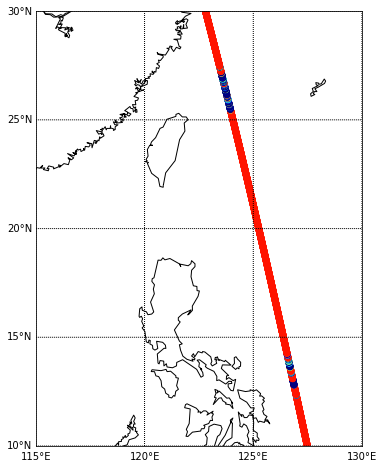

In [17]:
# Track plot
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=115, urcrnrlon=130., llcrnrlat=10., urcrnrlat=30.,resolution='l')
m.drawcoastlines(linewidth=1)
m.drawparallels(np.arange(-90., 120., 5.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 0, 1])
m.scatter(mo_longitude[:], latitude[:] , c=MODIS_cloud_fraction[:] ,cmap=plt.cm.get_cmap('jet',10), vmin=10, vmax=120)
#plt.show()

Text(0.5, 0, 'Latitude')

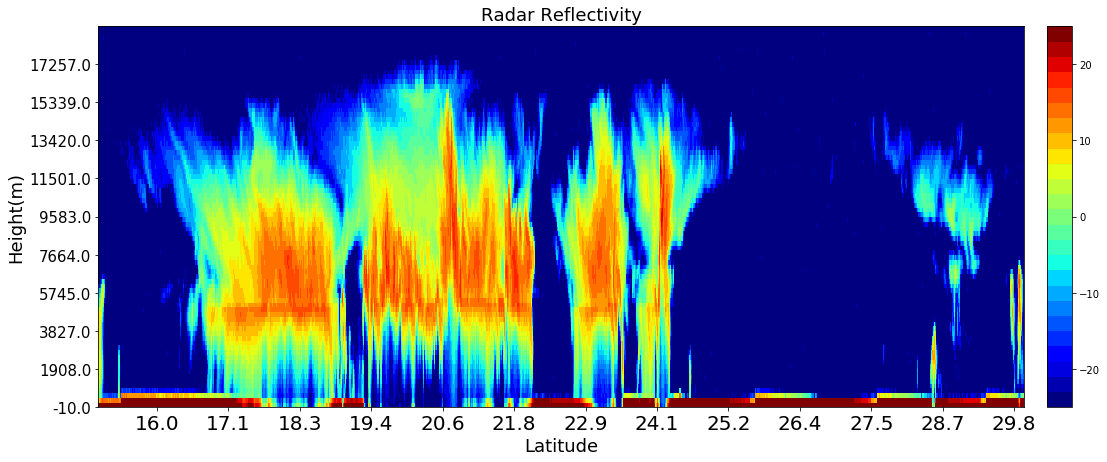

In [18]:
#雷達回波 plot
fig = plt.figure(figsize=(20,7)) 
plt.pcolormesh(r_Ref[20:100,:],cmap=plt.cm.get_cmap('jet',25), vmin=-25, vmax=25)
plt.colorbar(aspect=15, pad=0.02)
plt.title('Radar Reflectivity',fontsize=18)
#XY軸設定指令
plt.yticks(np.arange(0,80,step=8), (ref_height[20:100:8,]))
plt.xticks(np.arange(99,region_array_size[0],step=120), (region_lat[99:region_array_size[0]:120,0]))
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=15)
plt.ylabel('Height(m)',color='k',fontsize=18)
plt.xlabel('Latitude',color='k',fontsize=18)
#plt.show()